# import

1. 현재 페이지에서 사용되는 전체 import 선언

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, Normalizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping


# 데이터 불러오기

1. feature_path에 추출할 데이터 경로 지정

In [2]:
# 데이터 전처리
extract_feature_original_path = r".\data\original_data\extract_feature(original).csv"
df = pd.read_csv(extract_feature_original_path)
df

C:\Users\USER\AppData\Local\Temp\ipykernel_36900\3755693246.py:3: DtypeWarning: Columns (155,156,157,158,159,160,161,162,163,164,165,299,302,305,308,311,314,317,320,323,326,329,332,335,338,341,344) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(extract_feature_original_path)


,file_name,is_pe,DOS_HEADER/e_magic,DOS_HEADER/e_cblp,DOS_HEADER/e_cp,DOS_HEADER/e_crlc,DOS_HEADER/e_cparhdr,DOS_HEADER/e_minalloc,DOS_HEADER/e_maxalloc,DOS_HEADER/e_ss,...,byte_entropy_histogram_55,byte_entropy_histogram_56,byte_entropy_histogram_57,byte_entropy_histogram_58,byte_entropy_histogram_59,byte_entropy_histogram_60,byte_entropy_histogram_61,byte_entropy_histogram_62,byte_entropy_histogram_63,label
0,0005221f680e052526e38e898d16b9bc7c943c75256842...,True,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,...,101,2283,1520,1267,1438,1499,1336,1369,1576,"[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
1,002502891e9e63904545fafdac5256575df15d3c9a556e...,True,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,...,114,0,0,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,00436433cbc20393854a4bbfd835fa66ba454a180db125...,True,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,...,60920,1548473,1187521,1166745,1041460,1044369,907921,953308,970939,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
3,00561595f71768d7555b2a39fc0fd39819640b8b08af43...,True,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,...,305406,446,490,412,513,490,344,469,932,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,010103b7bc0821e3a051a03cdb34a3165a75b583663e45...,True,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,...,0,0,0,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28306,c3b097edf23f91726aa54e9a9fd6340bdf547a64778b17...,True,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,...,4189,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
28307,55ada07d6d2b99f5517f5dfab431d0a0abd04bebd9e383...,True,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,...,6849,1963,1641,817,1850,561,474,447,439,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
28308,63f49a8ead04e04ab149084141f162027ee51af6e9bb49...,True,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,...,0,7147,4805,3172,5716,2341,1875,1771,1845,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
28309,61b401f06250e85b4f4822c9c09f9ff6ba8303a5d4793b...,True,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,...,1393,5942,4967,3779,4666,2975,1836,1521,938,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


# none PE 데이터 제거

1. PE 데이터만 저장

2. is_pe 데이터 제거

3. 1, 2번의 데이터를 "extract_feature(PE)"로 저장 (경로는 data 내부)

4. ".\data\extract_feature(PE)" csv 데이터 읽기 (*추후 pe 데이터만 필요하면 읽기 부터 시작*)

In [5]:
# PE 데이터 저장
pe_data = df[df['is_pe'] != False]

# is_pe column 제거 
pe_data = pe_data.drop(columns=['is_pe'])

# 저장 경로 지정
extract_feature_PE_path = r".\data\pe_data\extract_feature(PE).csv"
pe_data.to_csv(extract_feature_PE_path, index=False)

pe_data 

,file_name,DOS_HEADER/e_magic,DOS_HEADER/e_cblp,DOS_HEADER/e_cp,DOS_HEADER/e_crlc,DOS_HEADER/e_cparhdr,DOS_HEADER/e_minalloc,DOS_HEADER/e_maxalloc,DOS_HEADER/e_ss,DOS_HEADER/e_sp,...,byte_entropy_histogram_55,byte_entropy_histogram_56,byte_entropy_histogram_57,byte_entropy_histogram_58,byte_entropy_histogram_59,byte_entropy_histogram_60,byte_entropy_histogram_61,byte_entropy_histogram_62,byte_entropy_histogram_63,label
0,0005221f680e052526e38e898d16b9bc7c943c75256842...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,101,2283,1520,1267,1438,1499,1336,1369,1576,"[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
1,002502891e9e63904545fafdac5256575df15d3c9a556e...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,114,0,0,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,00436433cbc20393854a4bbfd835fa66ba454a180db125...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,60920,1548473,1187521,1166745,1041460,1044369,907921,953308,970939,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
3,00561595f71768d7555b2a39fc0fd39819640b8b08af43...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,305406,446,490,412,513,490,344,469,932,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,010103b7bc0821e3a051a03cdb34a3165a75b583663e45...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,0,0,0,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28306,c3b097edf23f91726aa54e9a9fd6340bdf547a64778b17...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,4189,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
28307,55ada07d6d2b99f5517f5dfab431d0a0abd04bebd9e383...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,6849,1963,1641,817,1850,561,474,447,439,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
28308,63f49a8ead04e04ab149084141f162027ee51af6e9bb49...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,0,7147,4805,3172,5716,2341,1875,1771,1845,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
28309,61b401f06250e85b4f4822c9c09f9ff6ba8303a5d4793b...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,1393,5942,4967,3779,4666,2975,1836,1521,938,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [6]:
# PE 데이터 읽기
extract_feature_PE_path = r".\data\pe_data\extract_feature(PE).csv"
pe_data = pd.read_csv(extract_feature_PE_path)
pe_data

C:\Users\USER\AppData\Local\Temp\ipykernel_36900\3809123688.py:3: DtypeWarning: Columns (154,155,156,157,158,159,160,161,162,163,164) have mixed types. Specify dtype option on import or set low_memory=False.
  pe_data = pd.read_csv(extract_feature_PE_path)


,file_name,DOS_HEADER/e_magic,DOS_HEADER/e_cblp,DOS_HEADER/e_cp,DOS_HEADER/e_crlc,DOS_HEADER/e_cparhdr,DOS_HEADER/e_minalloc,DOS_HEADER/e_maxalloc,DOS_HEADER/e_ss,DOS_HEADER/e_sp,...,byte_entropy_histogram_55,byte_entropy_histogram_56,byte_entropy_histogram_57,byte_entropy_histogram_58,byte_entropy_histogram_59,byte_entropy_histogram_60,byte_entropy_histogram_61,byte_entropy_histogram_62,byte_entropy_histogram_63,label
0,0005221f680e052526e38e898d16b9bc7c943c75256842...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,101,2283,1520,1267,1438,1499,1336,1369,1576,"[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
1,002502891e9e63904545fafdac5256575df15d3c9a556e...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,114,0,0,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,00436433cbc20393854a4bbfd835fa66ba454a180db125...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,60920,1548473,1187521,1166745,1041460,1044369,907921,953308,970939,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
3,00561595f71768d7555b2a39fc0fd39819640b8b08af43...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,305406,446,490,412,513,490,344,469,932,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,010103b7bc0821e3a051a03cdb34a3165a75b583663e45...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,0,0,0,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23919,c3b097edf23f91726aa54e9a9fd6340bdf547a64778b17...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,4189,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
23920,55ada07d6d2b99f5517f5dfab431d0a0abd04bebd9e383...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,6849,1963,1641,817,1850,561,474,447,439,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
23921,63f49a8ead04e04ab149084141f162027ee51af6e9bb49...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,0,7147,4805,3172,5716,2341,1875,1771,1845,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
23922,61b401f06250e85b4f4822c9c09f9ff6ba8303a5d4793b...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,1393,5942,4967,3779,4666,2975,1836,1521,938,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


# string, hex 데이터 전처리

1. string 데이터 int 변경 (int 형 데이터만 변경)

2. hex 데이터 int 변경

3. bool 데이터 int 변경

In [7]:
# hex 데이터 int로 변경
def hex_to_decimal(hex_value):
    if isinstance(hex_value, str):
        try:
            if hex_value.startswith("0x"):
                hex_value = hex_value[2:]
            if hex_value == '0.0' or hex_value == '0':
                return 0
            return int(hex_value, 16)
        except ValueError as e:
            print(f"변환 오류 : {e}")
            return hex_value 
    return hex_value

In [9]:
# string 데이터 int로 변경
def string_to_int(hex_string):
    try:
        hex_bytes = hex_string.split()
        byte_array = bytes(int(x, 16) for x in hex_bytes)
        return int.from_bytes(byte_array, byteorder='big')
    except Exception as e:
        print(f"변환 오류: {e} - 값: {hex_string}")
        return 0

In [11]:
# bool 데이터 int로 변경 
def bool_to_int(data):
    bool_columns = data.select_dtypes(include=['bool'])
    data[bool_columns.columns] = bool_columns.astype(int)
    return data


In [12]:
string_to_int_data = pe_data
string_to_int_data = string_to_int_data.drop(columns=['file_name', 'label'])

# 데이터 전처리
if "DOS_HEADER/e_res" in string_to_int_data.columns:
    string_to_int_data['DOS_HEADER/e_res'] = string_to_int_data['DOS_HEADER/e_res'].apply(string_to_int)
if "DOS_HEADER/e_res2" in pe_data.columns:
    string_to_int_data['DOS_HEADER/e_res2'] = string_to_int_data['DOS_HEADER/e_res2'].apply(string_to_int)

none_hex_to_int_data = string_to_int_data.applymap(hex_to_decimal)
none_hex_to_int_data = pd.concat([pe_data[['file_name', 'label']], none_hex_to_int_data], axis=1)

numeric_data = bool_to_int(none_hex_to_int_data)

# 데이터 저장
numeric_data_path = r".\data\hex_string_data\extract_feature(PE_none_hex_and_string).csv"    
numeric_data.to_csv(numeric_data_path, index=False)


In [13]:
numeric_data_path = r".\data\hex_string_data\extract_feature(PE_none_hex_and_string).csv"
numeric_data = pd.read_csv(numeric_data_path)
numeric_data

,file_name,label,DOS_HEADER/e_magic,DOS_HEADER/e_cblp,DOS_HEADER/e_cp,DOS_HEADER/e_crlc,DOS_HEADER/e_cparhdr,DOS_HEADER/e_minalloc,DOS_HEADER/e_maxalloc,DOS_HEADER/e_ss,...,byte_entropy_histogram_54,byte_entropy_histogram_55,byte_entropy_histogram_56,byte_entropy_histogram_57,byte_entropy_histogram_58,byte_entropy_histogram_59,byte_entropy_histogram_60,byte_entropy_histogram_61,byte_entropy_histogram_62,byte_entropy_histogram_63
0,0005221f680e052526e38e898d16b9bc7c943c75256842...,"[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]",23117,144,3,0,4,0,65535,0,...,106,101,2283,1520,1267,1438,1499,1336,1369,1576
1,002502891e9e63904545fafdac5256575df15d3c9a556e...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",23117,144,3,0,4,0,65535,0,...,115,114,0,0,0,0,0,0,0,0
2,00436433cbc20393854a4bbfd835fa66ba454a180db125...,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]",23117,144,3,0,4,0,65535,0,...,32654,60920,1548473,1187521,1166745,1041460,1044369,907921,953308,970939
3,00561595f71768d7555b2a39fc0fd39819640b8b08af43...,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",23117,144,3,0,4,0,65535,0,...,68485,305406,446,490,412,513,490,344,469,932
4,010103b7bc0821e3a051a03cdb34a3165a75b583663e45...,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]",23117,144,3,0,4,0,65535,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23919,c3b097edf23f91726aa54e9a9fd6340bdf547a64778b17...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",23117,144,3,0,4,0,65535,0,...,2337,4189,0,0,0,0,0,0,0,0
23920,55ada07d6d2b99f5517f5dfab431d0a0abd04bebd9e383...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",23117,144,3,0,4,0,65535,0,...,2810,6849,1963,1641,817,1850,561,474,447,439
23921,63f49a8ead04e04ab149084141f162027ee51af6e9bb49...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",23117,144,3,0,4,0,65535,0,...,0,0,7147,4805,3172,5716,2341,1875,1771,1845
23922,61b401f06250e85b4f4822c9c09f9ff6ba8303a5d4793b...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",23117,144,3,0,4,0,65535,0,...,3411,1393,5942,4967,3779,4666,2975,1836,1521,938


# 결측치

1. 결측치 비율 출력

2. 결측치 히트맵 출력

3. 결측치 채우기

In [14]:
# 결측치 출력 함수
def PrintMissingRatio(pe_data):
    # file_name, label 필요없는 데이터 제거
    missing_data = pe_data.drop(columns=['file_name', 'label'])

    # 결측치 비율 계산
    missing_ratio = missing_data.isnull().mean()
    print("------------결측치------------\n")
    print(missing_ratio)
    print("\n-----------------------------\n")

    # 결측치가 포함된 column 출력
    print("결측치가 존재하는 column")
    print(missing_ratio[missing_ratio > 0])
    print("\n-----------------------------\n")
    return missing_ratio

In [15]:
# 결측치 히트맵 출력
def HeatmapMissingRatio(missing_ratio):
    # 데이터 개수를 만족하는 최소 값의 N 계산
    n = int(np.ceil(np.sqrt(len(missing_ratio))))

    # 인덱스와 결측치 비율을 list로 저장
    index = []
    for i in range(len(missing_ratio)):
        index.append(i)
    index_padding = index + [np.nan] * (n**2 - len(index))
    missing_ratio_padding = missing_ratio.values.tolist() + [np.nan] * (n**2 - len(missing_ratio))

    # 인덱스와 결측치 비율을 NxN 형식으로 저장
    index_2d = np.array(index_padding).reshape(n, n)
    missing_ratio_2d = np.array(missing_ratio_padding).reshape(n, n)

    # 히트맵 표시 데이터 저장
    annot = []
    for i in range(n):
        row = []
        for j in range(n):
            if not np.isnan(missing_ratio_2d[i, j]):
                value = f"{int(index_2d[i, j])}\n{missing_ratio_2d[i, j]:.2f}"
            else:
                value = "" 
            row.append(value)
        annot.append(row)  

    # 히트맵으로 데이터 출력
    plt.figure(figsize=(25, 25))
    sns.heatmap(missing_ratio_2d, cmap='coolwarm', cbar=True, linewidths=1, linecolor='black', annot=annot, fmt="")
    plt.title(f"Missing Data Ratio Heatmap ({n}x{n} Grid)")
    missing_reatio_heatmap_path = r".\data\missing_ratio\missing_data_ratio_heatmap.png"
    plt.savefig(missing_reatio_heatmap_path, bbox_inches='tight', dpi=300)
    plt.show()

------------결측치------------

DOS_HEADER/e_magic           0.0
DOS_HEADER/e_cblp            0.0
DOS_HEADER/e_cp              0.0
DOS_HEADER/e_crlc            0.0
DOS_HEADER/e_cparhdr         0.0
                            ... 
byte_entropy_histogram_59    0.0
byte_entropy_histogram_60    0.0
byte_entropy_histogram_61    0.0
byte_entropy_histogram_62    0.0
byte_entropy_histogram_63    0.0
Length: 879, dtype: float64

-----------------------------

결측치가 존재하는 column
OPTIONAL_HEADER/BaseOfData     0.084016
.text_Misc                     0.095051
.text_Misc_PhysicalAddress     0.095051
.text_Misc_VirtualSize         0.095051
.text_VirtualAddress           0.095051
                                 ...   
.exidx_PointerToLinenumbers    0.999582
.exidx_NumberOfRelocations     0.999582
.exidx_NumberOfLinenumbers     0.999582
.exidx_Characteristics         0.999582
.exidx_Entropy                 0.999582
Length: 241, dtype: float64

-----------------------------



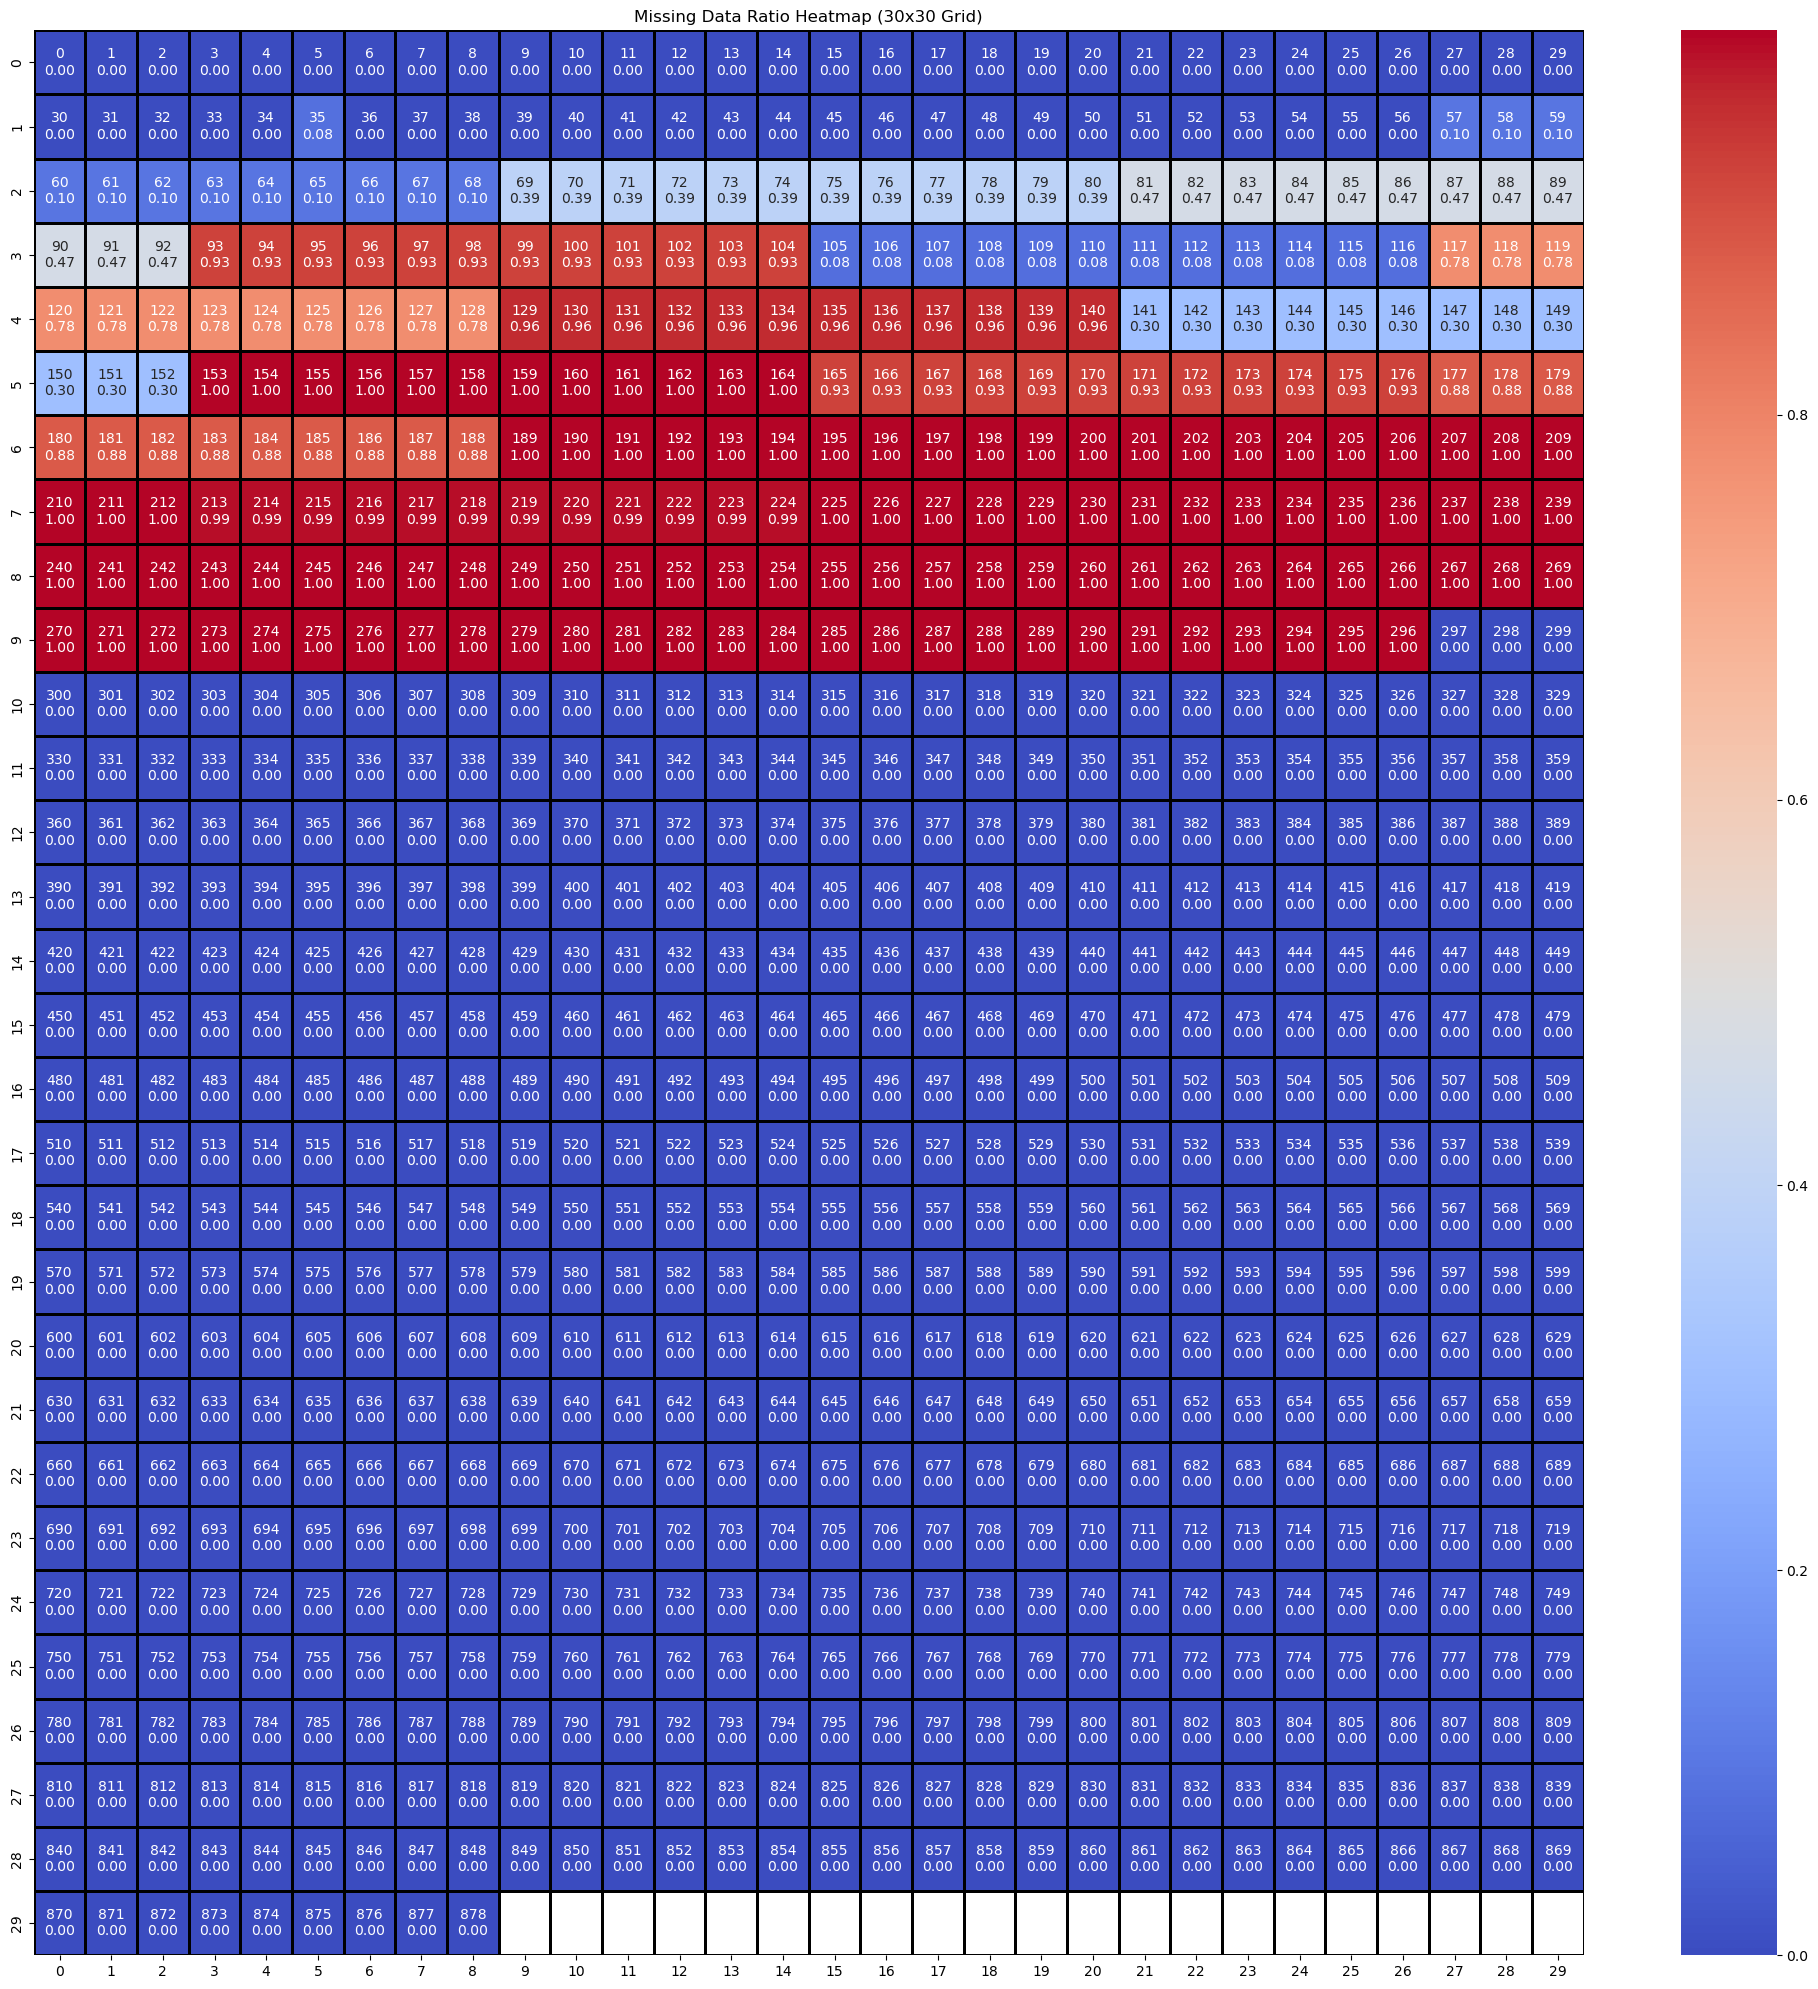

In [16]:
missing_ratio = PrintMissingRatio(numeric_data)
HeatmapMissingRatio(missing_ratio)

In [17]:
# 결측치 데이터 채우기 함수
def FillMissingData(pe_data, mode):
    # 'file_name'과 'label'을 제외한 나머지 데이터만 선택
    return_pe_data = pe_data.drop(columns=['file_name', 'label'])
    
    # 숫자형 데이터만 선택
    numeric_columns = return_pe_data.select_dtypes(include=['number']).columns
    pe_data_numeric = return_pe_data[numeric_columns]

    # 결측치 채우기 방식
    if mode == 0:
        pe_data_filled = pe_data_numeric.fillna(0)
    elif mode == 1:
        pe_data_filled = pe_data_numeric.apply(lambda col: col.fillna(col.max()))
    elif mode == 2:
        pe_data_filled = pe_data_numeric.apply(lambda col: col.fillna(col.min()))
    elif mode == 3:
        pe_data_filled = pe_data_numeric.apply(lambda col: col.fillna(col.mean()))
    elif mode == 4:  
        pe_data_filled = pe_data_numeric.apply(lambda col: col.fillna(col.mode()[0]))
    else:
        print("잘못된 모드 번호입니다.")
        return pe_data 

    return_pe_data[numeric_columns] = pe_data_filled
    return_pe_data = pd.concat([pe_data[['file_name', 'label']], return_pe_data], axis=1)
    
    return return_pe_data

In [18]:
# 0으로 채우기
zero_pe_data = FillMissingData(numeric_data, 0)
zero_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_zero).csv"
zero_pe_data.to_csv(zero_pe_data_path, index=False)

# 가장 큰 값으로 채우기
max_pe_data = FillMissingData(numeric_data, 1)
max_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_max).csv"
max_pe_data.to_csv(max_pe_data_path, index=False)

# 가장 작은 값으로 채우기
min_pe_data = FillMissingData(numeric_data, 2)
min_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_min).csv"
min_pe_data.to_csv(min_pe_data_path, index=False)

# 평균 값으로 채우기
mean_pe_data = FillMissingData(numeric_data, 3)
mean_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_mean).csv"
mean_pe_data.to_csv(mean_pe_data_path, index=False)

# 가장 많이 등장한 값으로 채우기
appear_pe_data = FillMissingData(numeric_data, 4)
appear_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_appear).csv"
appear_pe_data.to_csv(appear_pe_data_path, index=False)


In [19]:
# 경로
zero_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_zero).csv"
max_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_max).csv"
min_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_min).csv"
mean_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_mean).csv"
appear_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_appear).csv"


# 원하는 데이터로 결측치 결정
missing_data = pd.read_csv(zero_pe_data_path)
# missing_data = pd.read_csv(max_pe_data_path)
# missing_data = pd.read_csv(min_pe_data_path)
# missing_data = pd.read_csv(mean_pe_data_path)
# missing_data = pd.read_csv(appear_pe_data_path)

missing_data

,file_name,label,DOS_HEADER/e_magic,DOS_HEADER/e_cblp,DOS_HEADER/e_cp,DOS_HEADER/e_crlc,DOS_HEADER/e_cparhdr,DOS_HEADER/e_minalloc,DOS_HEADER/e_maxalloc,DOS_HEADER/e_ss,...,byte_entropy_histogram_54,byte_entropy_histogram_55,byte_entropy_histogram_56,byte_entropy_histogram_57,byte_entropy_histogram_58,byte_entropy_histogram_59,byte_entropy_histogram_60,byte_entropy_histogram_61,byte_entropy_histogram_62,byte_entropy_histogram_63
0,0005221f680e052526e38e898d16b9bc7c943c75256842...,"[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]",23117,144,3,0,4,0,65535,0,...,106,101,2283,1520,1267,1438,1499,1336,1369,1576
1,002502891e9e63904545fafdac5256575df15d3c9a556e...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",23117,144,3,0,4,0,65535,0,...,115,114,0,0,0,0,0,0,0,0
2,00436433cbc20393854a4bbfd835fa66ba454a180db125...,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]",23117,144,3,0,4,0,65535,0,...,32654,60920,1548473,1187521,1166745,1041460,1044369,907921,953308,970939
3,00561595f71768d7555b2a39fc0fd39819640b8b08af43...,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",23117,144,3,0,4,0,65535,0,...,68485,305406,446,490,412,513,490,344,469,932
4,010103b7bc0821e3a051a03cdb34a3165a75b583663e45...,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]",23117,144,3,0,4,0,65535,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23919,c3b097edf23f91726aa54e9a9fd6340bdf547a64778b17...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",23117,144,3,0,4,0,65535,0,...,2337,4189,0,0,0,0,0,0,0,0
23920,55ada07d6d2b99f5517f5dfab431d0a0abd04bebd9e383...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",23117,144,3,0,4,0,65535,0,...,2810,6849,1963,1641,817,1850,561,474,447,439
23921,63f49a8ead04e04ab149084141f162027ee51af6e9bb49...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",23117,144,3,0,4,0,65535,0,...,0,0,7147,4805,3172,5716,2341,1875,1771,1845
23922,61b401f06250e85b4f4822c9c09f9ff6ba8303a5d4793b...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",23117,144,3,0,4,0,65535,0,...,3411,1393,5942,4967,3779,4666,2975,1836,1521,938


In [20]:
#결측치 확인 (결측치가 없는 것을 확인하고 넘어가기)
PrintMissingRatio(missing_data)

------------결측치------------

DOS_HEADER/e_magic           0.0
DOS_HEADER/e_cblp            0.0
DOS_HEADER/e_cp              0.0
DOS_HEADER/e_crlc            0.0
DOS_HEADER/e_cparhdr         0.0
                            ... 
byte_entropy_histogram_59    0.0
byte_entropy_histogram_60    0.0
byte_entropy_histogram_61    0.0
byte_entropy_histogram_62    0.0
byte_entropy_histogram_63    0.0
Length: 879, dtype: float64

-----------------------------

결측치가 존재하는 column
Series([], dtype: float64)

-----------------------------



DOS_HEADER/e_magic           0.0
DOS_HEADER/e_cblp            0.0
DOS_HEADER/e_cp              0.0
DOS_HEADER/e_crlc            0.0
DOS_HEADER/e_cparhdr         0.0
                            ... 
byte_entropy_histogram_59    0.0
byte_entropy_histogram_60    0.0
byte_entropy_histogram_61    0.0
byte_entropy_histogram_62    0.0
byte_entropy_histogram_63    0.0
Length: 879, dtype: float64

# column 제거

(주의 : 아래의 1, 2번 중 데이터를 하나만 사용)

1. 상관 관계

2. 엔트로피

# 상관 관계


관련 없는 일부 데이터 제거 (안해도 상관없음)

In [21]:
# 상관관계가 높은 피처 추출
def get_highly_correlated_features(pe_data, threshold=0.8):
    # 상삼각 행렬만 추출하여 중복 제거
    upper = pe_data.where(np.triu(np.ones(pe_data.shape), k=1).astype(bool))
    return_pe_data = [column for column in upper.columns if any(upper[column] > threshold)]
    return return_pe_data

In [22]:
# threshold의 값을 변경해 데이터 삭제
threshold = 0.9

correlation_matrix = missing_data.drop(columns=['file_name', 'label'])

correlation_matrix = correlation_matrix.corr().abs()

highly_correlated_features = get_highly_correlated_features(correlation_matrix, threshold)

correlation_pe_data = missing_data.drop(columns=highly_correlated_features)

correlation_pe_data_path = r".\data\correlation\extract_feature(PE_correlation).csv"
correlation_pe_data.to_csv(correlation_pe_data_path, index=False)

# 엔트로피

1. 엔트로피 계산

2. 엔트로피 히트맵 출력

3. column 제거 (엔트로피 활용)

In [23]:
# 엔트로피 계산 함수
def CalculateEntropy(series):
    value_counts = series.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts))

# 필수 데이터 엔트로피 계산
def CalculateEssentialEntropy(pe_data):
    essential_data = pe_data.drop(columns=['file_name', 'label'])
    entropy = essential_data.apply(CalculateEntropy)
    return entropy

In [24]:
# 엔트로피 히트맵 출력
def HeatmapEntropy(entropy):
    # 데이터 개수를 만족하는 최소 값의 N 계산
    n = int(np.ceil(np.sqrt(len(entropy))))

    # 인덱스와 결측치 비율을 list로 저장
    index = []
    for i in range(len(entropy)):
        index.append(i)
    index_padding = index + [np.nan] * (n**2 - len(index))
    entorpy_padding = entropy.values.tolist() + [np.nan] * (n**2 - len(entropy))

    # 인덱스와 결측치 비율을 NxN 형식으로 저장
    index_2d = np.array(index_padding).reshape(n, n)
    entropy_2d = np.array(entorpy_padding).reshape(n, n)

    # 히트맵 표시 데이터 저장
    annot = []
    for i in range(n):
        row = []
        for j in range(n):
            if not np.isnan(entropy_2d[i, j]):
                value = f"{int(index_2d[i, j])}\n{entropy_2d[i, j]:.2f}"
            else:
                value = "" 
            row.append(value)
        annot.append(row)  


    # 히트맵으로 데이터 출력
    plt.figure(figsize=(25, 25))
    sns.heatmap(entropy_2d, cmap='coolwarm', cbar=True, linewidths=1, linecolor='black', annot=annot, fmt="")
    plt.title(f"Entropy Heatmap ({n}x{n} Grid)")
    entropy_heatmap_path = r".\data\entropy\entropy_heatmap.png"
    plt.savefig(entropy_heatmap_path, bbox_inches='tight', dpi=300)
    plt.show()


-----------엔트로피-----------

DOS_HEADER/e_magic          -0.000000
DOS_HEADER/e_cblp            0.517951
DOS_HEADER/e_cp              0.511108
DOS_HEADER/e_crlc            0.078811
DOS_HEADER/e_cparhdr         0.109286
                               ...   
byte_entropy_histogram_59    8.960205
byte_entropy_histogram_60    8.820727
byte_entropy_histogram_61    8.782600
byte_entropy_histogram_62    8.777522
byte_entropy_histogram_63    8.792193
Length: 879, dtype: float64

-----------------------------



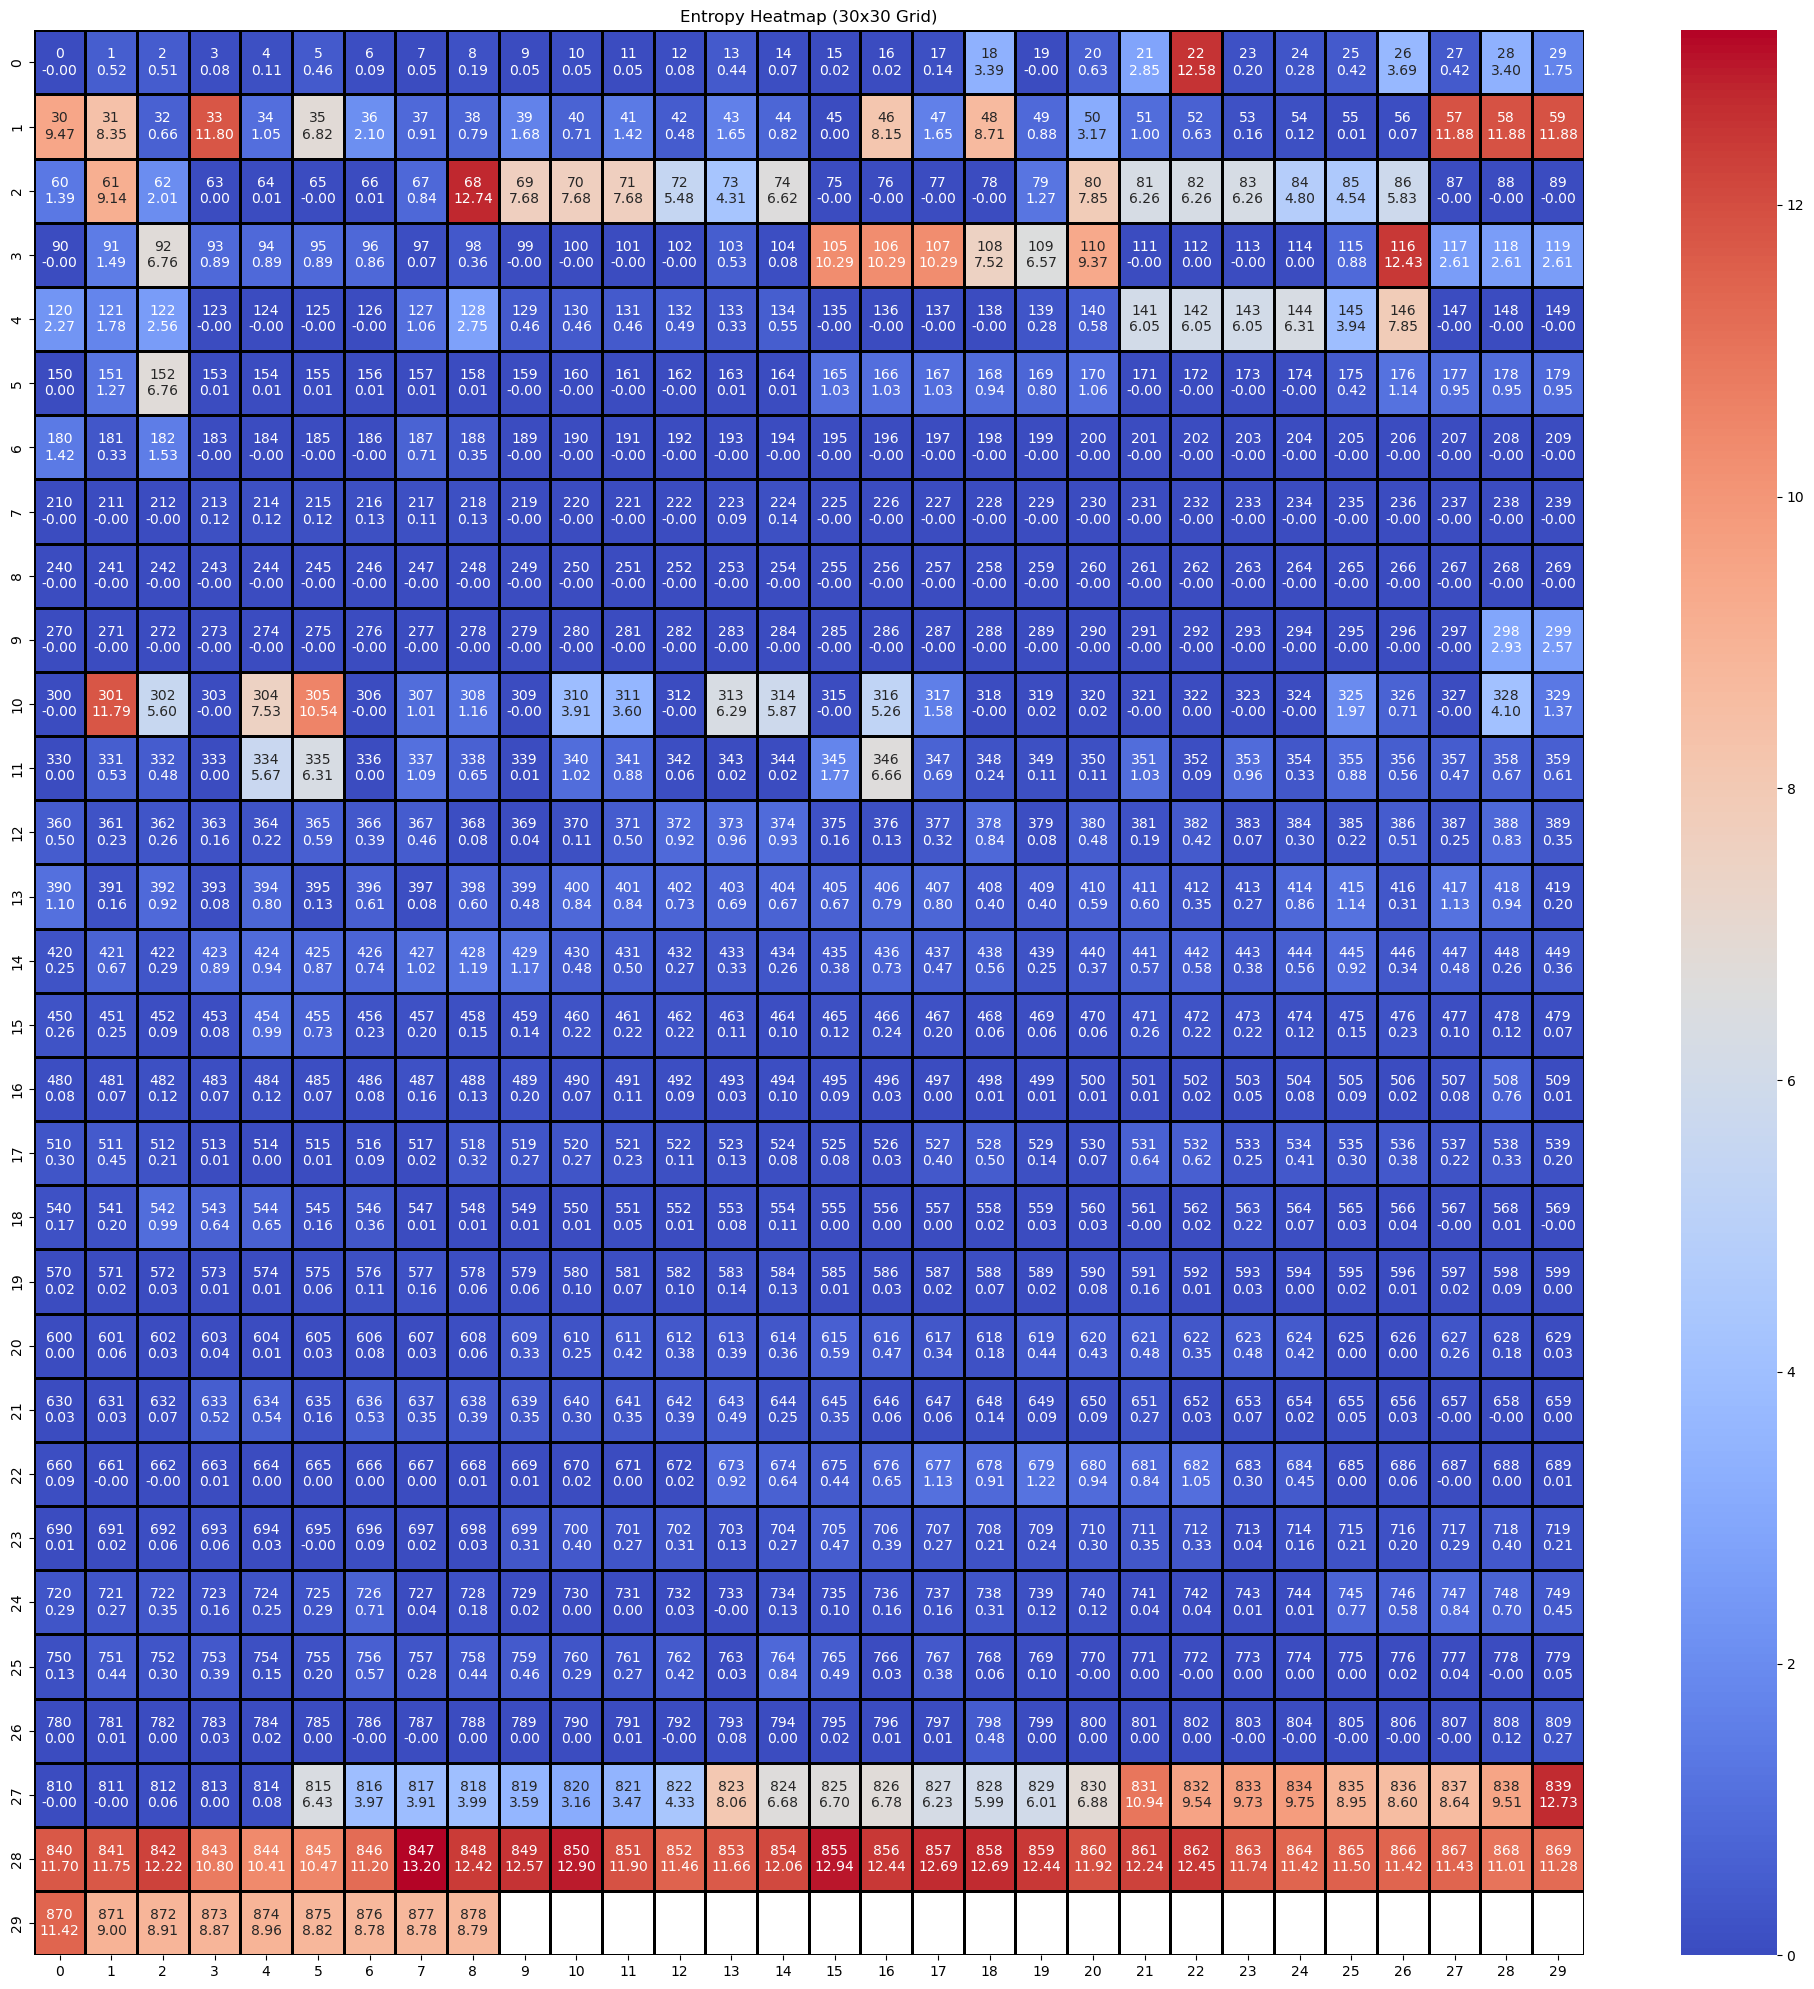

In [25]:
columns_entropy = CalculateEssentialEntropy(missing_data)
print("-----------엔트로피-----------\n")
print(columns_entropy)
print("\n-----------------------------\n")
HeatmapEntropy(columns_entropy)

In [26]:
# 엔트로피를 활용한 column 제거
def RemoveColumnsByEntropy(data, threshold, mode):
    
    entropy = CalculateEssentialEntropy(data)
    
    if mode == 0: # 엔트로피가 낮은 n%의 columns 제거 
        threshold_value = entropy.quantile(threshold/100) # 0~100까지의 숫자 입력
        columns_to_remove = entropy[entropy <= threshold_value].index
    elif mode == 1:
        columns_to_remove = entropy.nsmallest(threshold).index
    elif mode == 2:
        columns_to_remove = entropy[entropy <= threshold].index
    
    # 해당 컬럼들을 제거한 데이터프레임 반환
    df_cleaned = data.drop(columns=columns_to_remove)
    
    return df_cleaned

In [27]:
# 낮은 n% column 제거
entropy_x = 35
entropy_0_pe_data = RemoveColumnsByEntropy(missing_data, entropy_x, 0)
entropy_0_pe_data_path = r".\data\entropy\extract_feature(PE_entropy_0).csv"
entropy_0_pe_data.to_csv(entropy_0_pe_data_path, index=False)

# 낮은 n개 column 제거
entropy_n = 300
entropy_1_pe_data = RemoveColumnsByEntropy(missing_data, entropy_n, 1)
entropy_1_pe_data_path = r".\data\entropy\extract_feature(PE_entropy_1).csv"
entropy_1_pe_data.to_csv(entropy_1_pe_data_path, index=False)

# 특정 n보다 작은 column 제거
entropy_n = 0.5
entropy_2_pe_data = RemoveColumnsByEntropy(missing_data, entropy_n, 2)
entropy_2_pe_data_path = r".\data\entropy\extract_feature(PE_entropy_2).csv"
entropy_2_pe_data.to_csv(entropy_2_pe_data_path, index=False)

In [127]:
# 데이터 경로
correlation_pe_data_path = r".\data\correlation\extract_feature(PE_correlation).csv"
entropy_0_pe_data_path = r".\data\entropy\extract_feature(PE_entropy_0).csv"
entropy_1_pe_data_path = r".\data\entropy\extract_feature(PE_entropy_1).csv"
entropy_2_pe_data_path = r".\data\entropy\extract_feature(PE_entropy_2).csv"


# 원하는 데이터로 데이터 결정
# correlation_entropy_data = pd.read_csv(correlation_pe_data_path)
correlation_entropy_data = pd.read_csv(entropy_0_pe_data_path)
# correlation_entropy_data = pd.read_csv(entropy_1_pe_data_path)
# correlation_entropy_data = pd.read_csv(entropy_2_pe_data_path)

correlation_entropy_data

,file_name,label,DOS_HEADER/e_cblp,DOS_HEADER/e_cp,DOS_HEADER/e_crlc,DOS_HEADER/e_cparhdr,DOS_HEADER/e_minalloc,DOS_HEADER/e_maxalloc,DOS_HEADER/e_ss,DOS_HEADER/e_sp,...,byte_entropy_histogram_54,byte_entropy_histogram_55,byte_entropy_histogram_56,byte_entropy_histogram_57,byte_entropy_histogram_58,byte_entropy_histogram_59,byte_entropy_histogram_60,byte_entropy_histogram_61,byte_entropy_histogram_62,byte_entropy_histogram_63
0,0005221f680e052526e38e898d16b9bc7c943c75256842...,"[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]",144,3,0,4,0,65535,0,184,...,106,101,2283,1520,1267,1438,1499,1336,1369,1576
1,002502891e9e63904545fafdac5256575df15d3c9a556e...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",144,3,0,4,0,65535,0,184,...,115,114,0,0,0,0,0,0,0,0
2,00436433cbc20393854a4bbfd835fa66ba454a180db125...,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]",144,3,0,4,0,65535,0,184,...,32654,60920,1548473,1187521,1166745,1041460,1044369,907921,953308,970939
3,00561595f71768d7555b2a39fc0fd39819640b8b08af43...,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",144,3,0,4,0,65535,0,184,...,68485,305406,446,490,412,513,490,344,469,932
4,010103b7bc0821e3a051a03cdb34a3165a75b583663e45...,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]",144,3,0,4,0,65535,0,184,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23919,c3b097edf23f91726aa54e9a9fd6340bdf547a64778b17...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",144,3,0,4,0,65535,0,184,...,2337,4189,0,0,0,0,0,0,0,0
23920,55ada07d6d2b99f5517f5dfab431d0a0abd04bebd9e383...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",144,3,0,4,0,65535,0,184,...,2810,6849,1963,1641,817,1850,561,474,447,439
23921,63f49a8ead04e04ab149084141f162027ee51af6e9bb49...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",144,3,0,4,0,65535,0,184,...,0,0,7147,4805,3172,5716,2341,1875,1771,1845
23922,61b401f06250e85b4f4822c9c09f9ff6ba8303a5d4793b...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",144,3,0,4,0,65535,0,184,...,3411,1393,5942,4967,3779,4666,2975,1836,1521,938


# 정규화화

1. 정규화 함수

In [128]:
NORMALIZE_VALUE ={
    "0":"Normalizer",
    "1":"MinMaxScaler",
    "2":"MaxAbsScaler"
}

In [129]:
# 정규화 함수
def NormalizeData(data, mode):
    if mode == 0:
        scaler = Normalizer()  # 벡터 크기를 기준으로 정규화
    elif mode == 1:
        scaler = MinMaxScaler()  # 0과 1 사이로 정규화
    elif mode == 2:
        scaler = MaxAbsScaler()  # 최대 절댓값을 기준으로 정규화
    else:
        print("정규화 오류(normalize_data) : 입력값이 잘못되었습니다.")
    
    normalized_data = scaler.fit_transform(data)

    return normalized_data

In [130]:
# file_name, label 제거 후 정규화 진행
def SelectNormalizeMode(data, mode):
    normalize_data = data.drop(columns = ['file_name', 'label'])
    numeric_columns = normalize_data.select_dtypes(include=['number']).columns
    numeric_data = data[numeric_columns]

    # 정규화
    normalize_numeric_data = NormalizeData(numeric_data, mode)
            
    # 최종 데이터 생성
    normalize_data[numeric_columns] = normalize_numeric_data
    normalize_data = pd.concat([data[['file_name', 'label']], normalize_data], axis=1)

    return normalize_data

In [131]:
normalize_0_pe_data = SelectNormalizeMode(correlation_entropy_data, 0)
normalize_0_pe_data_path = r".\data\normalize\extract_feature(PE_normalize_0).csv"
normalize_0_pe_data.to_csv(normalize_0_pe_data_path, index=False)

normalize_1_pe_data = SelectNormalizeMode(correlation_entropy_data, 1)
normalize_1_pe_data_path = r".\data\normalize\extract_feature(PE_normalize_1).csv"
normalize_1_pe_data.to_csv(normalize_1_pe_data_path, index=False)

normalize_2_pe_data = SelectNormalizeMode(correlation_entropy_data, 2)
normalize_2_pe_data_path = r".\data\normalize\extract_feature(PE_normalize_2).csv"
normalize_2_pe_data.to_csv(normalize_2_pe_data_path, index=False)

In [132]:
# 경로
normalize_0_pe_data_path = r".\data\normalize\extract_feature(PE_normalize_0).csv"
normalize_1_pe_data_path = r".\data\normalize\extract_feature(PE_normalize_1).csv"
normalize_2_pe_data_path = r".\data\normalize\extract_feature(PE_normalize_2).csv"

# 원하는 데이터로 정규화 결정
normalize_data = pd.read_csv(normalize_0_pe_data_path)
# normalize_data = pd.read_csv(normalize_1_pe_data_path)
# normalize_data = pd.read_csv(normalize_2_pe_data_path)

normalize_data

,file_name,label,DOS_HEADER/e_cblp,DOS_HEADER/e_cp,DOS_HEADER/e_crlc,DOS_HEADER/e_cparhdr,DOS_HEADER/e_minalloc,DOS_HEADER/e_maxalloc,DOS_HEADER/e_ss,DOS_HEADER/e_sp,...,byte_entropy_histogram_54,byte_entropy_histogram_55,byte_entropy_histogram_56,byte_entropy_histogram_57,byte_entropy_histogram_58,byte_entropy_histogram_59,byte_entropy_histogram_60,byte_entropy_histogram_61,byte_entropy_histogram_62,byte_entropy_histogram_63
0,0005221f680e052526e38e898d16b9bc7c943c75256842...,"[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]",3.629780e-08,7.562042e-10,0.0,1.008272e-09,0.0,0.000017,0.0,4.638052e-08,...,2.671921e-08,2.545887e-08,5.754714e-07,3.831435e-07,3.193702e-07,3.624739e-07,3.778500e-07,3.367629e-07,3.450812e-07,3.972593e-07
1,002502891e9e63904545fafdac5256575df15d3c9a556e...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",5.224004e-08,1.088334e-09,0.0,1.451112e-09,0.0,0.000024,0.0,6.675116e-08,...,4.171948e-08,4.135670e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,00436433cbc20393854a4bbfd835fa66ba454a180db125...,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]",9.176527e-08,1.911776e-09,0.0,2.549035e-09,0.0,0.000042,0.0,1.172556e-07,...,2.080905e-05,3.882181e-05,9.867780e-04,7.567582e-04,7.435185e-04,6.636795e-04,6.655333e-04,5.785806e-04,6.075039e-04,6.187394e-04
3,00561595f71768d7555b2a39fc0fd39819640b8b08af43...,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",3.551061e-08,7.398043e-10,0.0,9.864057e-10,0.0,0.000016,0.0,4.537466e-08,...,1.688850e-05,7.531355e-05,1.099842e-07,1.208347e-07,1.015998e-07,1.265065e-07,1.208347e-07,8.483089e-08,1.156561e-07,2.298325e-07
4,010103b7bc0821e3a051a03cdb34a3165a75b583663e45...,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]",5.181535e-08,1.079486e-09,0.0,1.439315e-09,0.0,0.000024,0.0,6.620850e-08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23919,c3b097edf23f91726aa54e9a9fd6340bdf547a64778b17...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2.398152e-08,4.996150e-10,0.0,6.661534e-10,0.0,0.000011,0.0,3.064306e-08,...,3.892001e-07,6.976291e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
23920,55ada07d6d2b99f5517f5dfab431d0a0abd04bebd9e383...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",3.081874e-08,6.420572e-10,0.0,8.560762e-10,0.0,0.000014,0.0,3.937951e-08,...,6.013936e-07,1.465817e-06,4.201194e-07,3.512053e-07,1.748536e-07,3.959353e-07,1.200647e-07,1.014450e-07,9.566652e-08,9.395437e-08
23921,63f49a8ead04e04ab149084141f162027ee51af6e9bb49...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",5.352124e-08,1.115026e-09,0.0,1.486701e-09,0.0,0.000024,0.0,6.838826e-08,...,0.000000e+00,0.000000e+00,2.656363e-06,1.785900e-06,1.178954e-06,2.124496e-06,8.700919e-07,6.968912e-07,6.582370e-07,6.857409e-07
23922,61b401f06250e85b4f4822c9c09f9ff6ba8303a5d4793b...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",3.356716e-08,6.993159e-10,0.0,9.324212e-10,0.0,0.000015,0.0,4.289137e-08,...,7.951222e-07,3.247157e-07,1.385112e-06,1.157834e-06,8.809049e-07,1.087669e-06,6.934882e-07,4.279813e-07,3.545531e-07,2.186528e-07


# 표준화

1. 표준화 함수

In [133]:
STANDARDIZE_VALUE = {
    "0":"StandardScaler",
    "1":"RobustScaler",
    "2":"PowerTransformer"
}

In [134]:
# 표준화
def StandardizeData(data, mode):
    if mode == 0:
        scaler = StandardScaler()  # 평균 0, 표준편차 1로 표준화
    elif mode == 1:
        scaler = RobustScaler()  # 중앙값과 IQR을 기준으로 표준화
    elif mode == 2:
        scaler = PowerTransformer()  # 비정규 분포 데이터를 정규 분포로 변환
    else:
        print("표준화 오류(standardize_data) : 입력값이 잘못되었습니다.")
    
    standardized_data = scaler.fit_transform(data)
    return standardized_data

In [135]:
# file_name, label 제거 후 표준화 진행
def SelectStandardizeMode(data, mode):
    standardize_data = data.drop(columns = ['file_name', 'label'])
    numeric_columns = standardize_data.select_dtypes(include=['number']).columns
    numeric_data = data[numeric_columns]

    # 표준화
    standardize_numeric_data = StandardizeData(numeric_data, mode)

    # 최종 데이터 생성
    standardize_data[numeric_columns] = standardize_numeric_data
    standardize_data = pd.concat([data[['file_name', 'label']], standardize_data], axis=1)
    
    return standardize_data


In [136]:
standardize_0_pe_data = SelectStandardizeMode(normalize_data, 0)
standardize_0_pe_data_path = r".\data\standardize\extract_feature(PE_standardize_0).csv"
standardize_0_pe_data.to_csv(standardize_0_pe_data_path, index=False)

standardize_1_pe_data = SelectStandardizeMode(normalize_data, 1)
standardize_1_pe_data_path = r".\data\standardize\extract_feature(PE_standardize_1).csv"
standardize_1_pe_data.to_csv(standardize_1_pe_data_path, index=False)

standardize_2_pe_data = SelectStandardizeMode(normalize_data, 2)
standardize_2_pe_data_path = r".\data\standardize\extract_feature(PE_standardize_2).csv"
standardize_2_pe_data.to_csv(standardize_2_pe_data_path, index=False)

In [137]:
# 경로
standardize_0_pe_data_path = r".\data\standardize\extract_feature(PE_standardize_0).csv"
standardize_1_pe_data_path = r".\data\standardize\extract_feature(PE_standardize_1).csv"
standardize_2_pe_data_path = r".\data\standardize\extract_feature(PE_standardize_2).csv"

# 원하는 데이터로 표준화 결정
standardize_data = pd.read_csv(standardize_0_pe_data_path)
# standardize_data = pd.read_csv(standardize_1_pe_data_path)
# standardize_data = pd.read_csv(standardize_2_pe_data_path)

standardize_data

,file_name,label,DOS_HEADER/e_cblp,DOS_HEADER/e_cp,DOS_HEADER/e_crlc,DOS_HEADER/e_cparhdr,DOS_HEADER/e_minalloc,DOS_HEADER/e_maxalloc,DOS_HEADER/e_ss,DOS_HEADER/e_sp,...,byte_entropy_histogram_54,byte_entropy_histogram_55,byte_entropy_histogram_56,byte_entropy_histogram_57,byte_entropy_histogram_58,byte_entropy_histogram_59,byte_entropy_histogram_60,byte_entropy_histogram_61,byte_entropy_histogram_62,byte_entropy_histogram_63
0,0005221f680e052526e38e898d16b9bc7c943c75256842...,"[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]",-0.021369,-0.019313,-0.014846,-0.019094,-0.018751,-0.021360,-0.006882,-0.021539,...,-0.061400,-0.061428,-0.132778,-0.142813,-0.141668,-0.145018,-0.141268,-0.141692,-0.142120,-0.141535
1,002502891e9e63904545fafdac5256575df15d3c9a556e...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.033890,-0.013077,-0.014846,-0.006759,-0.018751,-0.002947,-0.006882,-0.003827,...,-0.061276,-0.061349,-0.138327,-0.147363,-0.145489,-0.149546,-0.146004,-0.146154,-0.146617,-0.146560
2,00436433cbc20393854a4bbfd835fa66ba454a180db125...,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]",0.170894,0.002386,-0.014846,0.023823,-0.018751,0.042704,-0.006882,0.040083,...,0.110562,0.131414,9.376320,8.839281,8.751342,8.140033,8.195418,7.520652,7.770055,7.679539
3,00561595f71768d7555b2a39fc0fd39819640b8b08af43...,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",-0.024098,-0.019621,-0.014846,-0.019704,-0.018751,-0.022269,-0.006882,-0.022413,...,0.078122,0.312801,-0.137266,-0.145928,-0.144273,-0.147966,-0.144489,-0.145030,-0.145109,-0.143653
4,010103b7bc0821e3a051a03cdb34a3165a75b583663e45...,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]",0.032418,-0.013243,-0.014846,-0.007088,-0.018751,-0.003438,-0.006882,-0.004299,...,-0.061621,-0.061555,-0.138327,-0.147363,-0.145489,-0.149546,-0.146004,-0.146154,-0.146617,-0.146560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23919,c3b097edf23f91726aa54e9a9fd6340bdf547a64778b17...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",-0.064061,-0.024132,-0.014846,-0.028624,-0.018751,-0.035585,-0.006882,-0.035221,...,-0.058400,-0.058087,-0.138327,-0.147363,-0.145489,-0.149546,-0.146004,-0.146154,-0.146617,-0.146560
23920,55ada07d6d2b99f5517f5dfab431d0a0abd04bebd9e383...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",-0.040361,-0.021457,-0.014846,-0.023334,-0.018751,-0.027688,-0.006882,-0.027626,...,-0.056645,-0.054269,-0.134276,-0.143192,-0.143397,-0.144600,-0.144499,-0.144810,-0.145370,-0.145371
23921,63f49a8ead04e04ab149084141f162027ee51af6e9bb49...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.038331,-0.012575,-0.014846,-0.005768,-0.018751,-0.001467,-0.006882,-0.002404,...,-0.061621,-0.061555,-0.112714,-0.126155,-0.131382,-0.123010,-0.135098,-0.136919,-0.138039,-0.137886
23922,61b401f06250e85b4f4822c9c09f9ff6ba8303a5d4793b...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",-0.030834,-0.020382,-0.014846,-0.021207,-0.018751,-0.024514,-0.006882,-0.024572,...,-0.055042,-0.059941,-0.124972,-0.133613,-0.134948,-0.135960,-0.137312,-0.140483,-0.141996,-0.143794


# 딥러닝

1. 데이터 분할

2. 모델 생성

3. 학습

4. f1 score 출력

# 딥러닝

In [264]:
X = normalize_data.drop(columns=['file_name', 'label'], axis=1)
y = normalize_data['label']
y = np.array(y.apply(lambda x: eval(x)).tolist())

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [266]:
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
X_val = X_val.astype(np.float64)

In [267]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

In [ ]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU

model = Sequential()

# 입력층
model.add(Dense(128, input_dim=X_train.shape[1], kernel_initializer='he_normal'))

# 1번째 층
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.4))
model.add(BatchNormalization())

# 2번째 층
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.4))
model.add(BatchNormalization())

# 3번째 층
model.add(Dense(32, kernel_initializer='he_normal'))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.4))
model.add(BatchNormalization())

# 출력층
model.add(Dense(13, activation='sigmoid'))

learning_rate_schedule = ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True
)

optimizer = Adam(
    learning_rate=learning_rate_schedule, 
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False
)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [269]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=5, min_lr=1e-6, verbose=1)

history = model.fit(X_train, y_train, 
          epochs=1000, 
          batch_size=64, 
          validation_data=(X_val, y_val),
          callbacks=[early_stopping, lr_reduction])

Epoch 1/1000
240/240 [==============================] - 3s 4ms/step - loss: 0.8090 - accuracy: 0.0801 - val_loss: 0.7060 - val_accuracy: 0.0677 - lr: 1.0000e-04
Epoch 2/1000
240/240 [==============================] - 1s 4ms/step - loss: 0.7530 - accuracy: 0.1130 - val_loss: 0.6672 - val_accuracy: 0.1162 - lr: 1.0000e-04
Epoch 3/1000
240/240 [==============================] - 1s 4ms/step - loss: 0.7044 - accuracy: 0.1674 - val_loss: 0.6334 - val_accuracy: 0.3271 - lr: 1.0000e-04
Epoch 4/1000
240/240 [==============================] - 1s 4ms/step - loss: 0.6546 - accuracy: 0.2457 - val_loss: 0.5861 - val_accuracy: 0.5050 - lr: 1.0000e-04
Epoch 5/1000
240/240 [==============================] - 1s 4ms/step - loss: 0.5995 - accuracy: 0.3545 - val_loss: 0.5395 - val_accuracy: 0.6210 - lr: 1.0000e-04
Epoch 6/1000
240/240 [==============================] - 1s 4ms/step - loss: 0.5378 - accuracy: 0.4933 - val_loss: 0.4770 - val_accuracy: 0.7158 - lr: 1.0000e-04
Epoch 7/1000
240/240 [============

In [229]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f'테스트 데이터에서의 정확도: {accuracy * 100:.2f}%')

120/120 [==============================] - 0s 2ms/step - loss: 0.2319 - accuracy: 0.6648
테스트 데이터에서의 정확도: 66.48%


In [188]:
y_pred = model.predict(X_val)
threshold = 0.7
y_pred_binary = (y_pred > threshold).astype(int)
print(y_pred_binary[0])

120/120 [==============================] - 0s 1ms/step
[1 0 0 0 0 0 0 0 0 0 0 0 0]


In [233]:
import os
model_path = r".\data\model"
model_name = "테스트.h5"
model.save(os.path.join(model_path, model_name))  # .h5 형식으로 저장


c:\Users\USER\anaconda\envs\jaejudo\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 머신 러닝

In [ ]:
# 머신 러닝
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 데이터 로드
data = pd.read_csv(r"C:\Users\USER\Desktop\jaejudo\AI\data\standardize\extract_feature(PE_standardize_0).csv")

# 특징과 레이블 준비
y = data['label']
X = data.drop(columns=['file_name', 'label'], axis=1)

# 데이터를 훈련 데이터와 테스트 데이터로 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest 모델 정의
rf_model = RandomForestClassifier(n_estimators=100)

# K-Fold Cross Validation 적용 (예: 5-Fold)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=4, scoring='accuracy')

# K-Fold Cross Validation의 평균 정확도
print(f'K-Fold Cross Validation 정확도: {np.mean(cv_scores) * 100:.2f}%')

# 모델을 전체 훈련 데이터로 학습
rf_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = rf_model.predict(X_test)

# 정확도 평가
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'테스트 데이터 정확도: {accuracy * 100:.2f}%')


K-Fold Cross Validation 정확도: 96.36%
테스트 데이터 정확도: 96.77%
